# Sales prediction using Linear regression model


In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


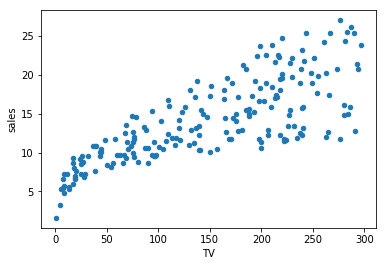

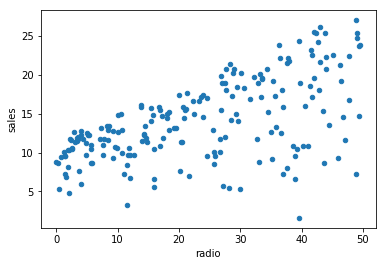

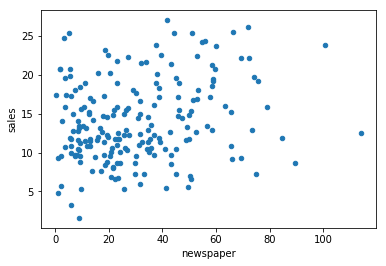

In [3]:
data.plot(kind="scatter", x="TV", y="sales")
data.plot(kind="scatter", x="radio", y="sales")
data.plot(kind="scatter", x="newspaper", y="sales")

In [4]:
normalized_data = (data - data.mean())/data.std()

In [20]:
train_set, test_set = train_test_split(normalized_data, test_size=0.2, random_state=100)
train_X, train_Y = train_set[['TV', 'radio', 'newspaper']], train_set[['sales']]
test_X, test_Y = test_set[['TV', 'radio', 'newspaper']], test_set[['sales']]

In [92]:
def get_next_batch(X, Y, idx, batch_size):
    return X[idx*batch_size: (idx + 1)*batch_size], Y[idx*batch_size: (idx + 1)*batch_size]

In [134]:
# Linear regression model implemention
def linear_regression_model(epochs=10, regularization=0.1, batch_cnt=10):
    weights = None
    bias = None
    
    # Mini Batch Gradient descent parameters
    batch_size = int(train_X.shape[0]/batch_cnt)
        
    X = tf.placeholder(tf.float32, shape=(None, 3), name='X')
    Y = tf.placeholder(tf.float32, shape=(None, 1), name='Y')

    w = tf.Variable(0.01*tf.random_normal(shape=(train_X.shape[1],1)), name='W')
    b = tf.Variable(0.0, name='b')

    Y_predicted = tf.matmul(X, w) + b

    loss = tf.reduce_mean(tf.square(Y - Y_predicted, name='loss') + 
                          regularization*tf.reduce_sum(tf.square(w))) 

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
    
    train_losses = []
    test_losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for i in range(epochs):
        
            for idx in range(0, batch_cnt):
                mini_X, mini_Y = get_next_batch(train_X, train_Y, idx, batch_size)
                train_loss_val,_ = sess.run([loss, optimizer], 
                                            feed_dict={X: mini_X, Y: mini_Y})
                train_losses.append(train_loss_val)
                
                test_loss_val = sess.run([loss], feed_dict={X: test_X, Y: test_Y})
                test_losses.append(test_loss_val)
    
                
        plt.plot(range(0, epochs*batch_cnt), train_losses, '-',label='training')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        plt.plot(range(0, epochs*batch_cnt), test_losses, '-', label='test')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    
                            

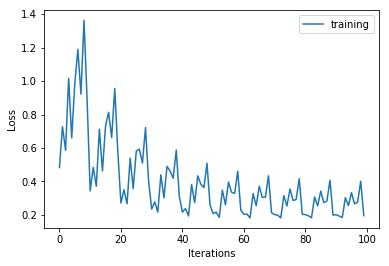

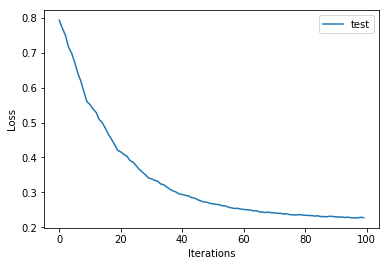

In [136]:
linear_regression_model(regularization=0.2)